In [1]:
import numpy as np
import pandas as pd
from subprocess import check_output
from keras.layers import Dense,Activation,Dropout
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import time
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis

In [2]:
data=pd.read_excel('prices.xlsx')
data.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600


In [3]:
data.shape

(851264, 7)

In [4]:
yahoo=data[data['symbol']=='YHOO']
yahoo_stk_prices=yahoo.close.values.astype('float32')

In [5]:
yahoo_stk_prices.shape

(1762,)

In [6]:
yahoo_stk_prices=yahoo_stk_prices.reshape(1762,1)
yahoo_stk_prices.shape

(1762, 1)

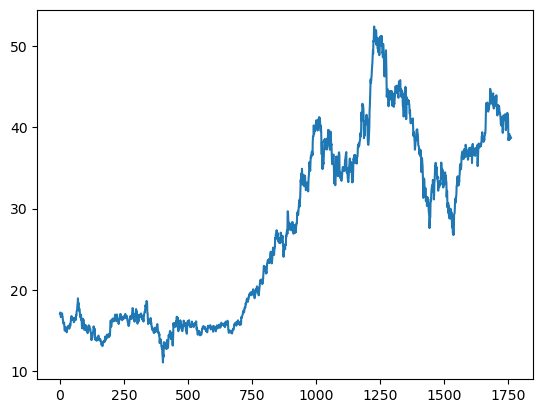

In [7]:
plt.plot(yahoo_stk_prices)
plt.show()

In [8]:
scaler=MinMaxScaler(feature_range=(0,1))
yahoo_stk_prices=scaler.fit_transform(yahoo_stk_prices)

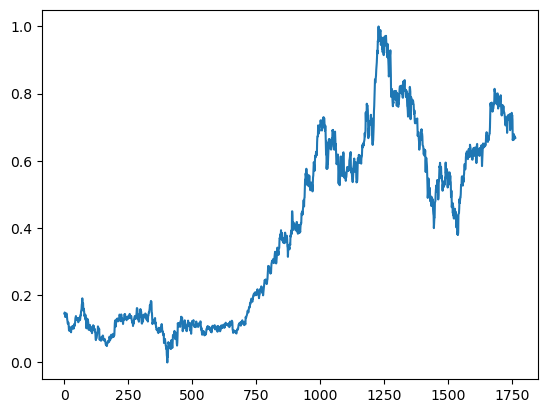

In [9]:
#after scalling
plt.plot(yahoo_stk_prices)
plt.show()

In [12]:
train_size=int(len(yahoo_stk_prices)*0.80)
test_size=len(yahoo_stk_prices)-train_size
train,test=yahoo_stk_prices[0:train_size,:],yahoo_stk_prices[train_size:len(yahoo_stk_prices)]
print(len(train),len(test))

1409 353


In [13]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)


In [14]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [15]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [16]:
from keras.layers import LSTM
#Step 2 Build Model
model = Sequential()

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100,return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=12))
model.add(Activation('linear'))
start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print ('compilation time : ', time.time() - start)

compilation time :  0.015622377395629883


In [17]:
model.fit(trainX,trainY,batch_size=128,epochs=10,validation_split=0.05)


Epoch 1/10
11/11 [==============================] - 6s 94ms/step - loss: 0.1632 - val_loss: 0.4664
Epoch 2/10
11/11 [==============================] - 0s 10ms/step - loss: 0.1435 - val_loss: 0.4163
Epoch 3/10
11/11 [==============================] - 0s 10ms/step - loss: 0.1230 - val_loss: 0.3527
Epoch 4/10
11/11 [==============================] - 0s 10ms/step - loss: 0.1005 - val_loss: 0.2778
Epoch 5/10
11/11 [==============================] - 0s 9ms/step - loss: 0.0793 - val_loss: 0.2042
Epoch 6/10
11/11 [==============================] - 0s 9ms/step - loss: 0.0646 - val_loss: 0.1439
Epoch 7/10
11/11 [==============================] - 0s 9ms/step - loss: 0.0565 - val_loss: 0.1136
Epoch 8/10
11/11 [==============================] - 0s 9ms/step - loss: 0.0513 - val_loss: 0.1002
Epoch 9/10
11/11 [==============================] - 0s 10ms/step - loss: 0.0466 - val_loss: 0.0825
Epoch 10/10
11/11 [==============================] - 0s 9ms/step - loss: 0.0409 - val_loss: 0.0734


1/1 [==============================] - 1s 789ms/step
[[0.41621143 0.42245507 0.410244   0.42800868 0.43497834 0.40956533
  0.42588663 0.4293925  0.42945063 0.43189102 0.42420077 0.43036595]]
1/1 [==============================] - 1s 1s/step
[[0.7713509  0.7940454  0.74307585 0.80868584 0.8348758  0.74362415
  0.8063536  0.8144323  0.8156459  0.8256191  0.808609   0.8219309 ]]
1/1 [==============================] - 0s 21ms/step
[[1.1753843 1.2221451 1.1201956 1.2486364 1.2949204 1.1229658 1.2444508
  1.2538109 1.2578638 1.2769802 1.2534341 1.2701354]]
1/1 [==============================] - 0s 22ms/step
[[1.6307712 1.709264  1.5483329 1.7536143 1.8214914 1.553982  1.7426579
  1.7487864 1.7604347 1.7923602 1.7587095 1.7780982]]
1/1 [==============================] - 0s 22ms/step
[[2.102195  2.2179418 1.9992301 2.2865489 2.3752084 2.007557  2.2622979
  2.2592225 2.285185  2.3343182 2.2845168 2.3070245]]
1/1 [==============================] - 0s 20ms/step
[[28.271208]
 [42.931366]
 [59.6098

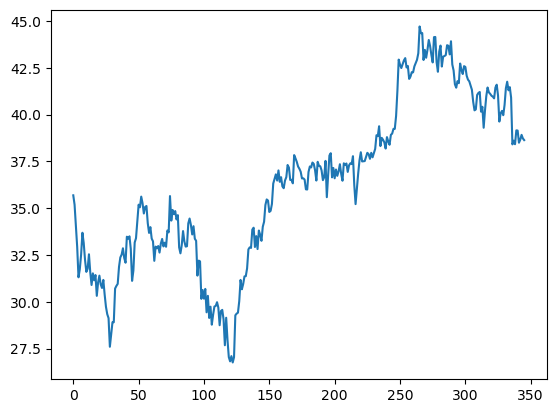

In [20]:
def plt_results_multiple(predicted_data, true_data,length):
    plt.plot(scaler.inverse_transform(true_data.reshape(-1, 1))[length:])
    plt.plot(scaler.inverse_transform(np.array(predicted_data).reshape(-1, 1))[length:])
    plt.show()

#predict length consecutive values from a real one
def predict_sequences_multiple(model, firstValue,length):
    prediction_seqs = []
    curr_frame = firstValue

    for i in range(length):
        predicted = [] 

        print(model.predict(curr_frame[newaxis,:,:]))
        predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])

        curr_frame = curr_frame[0:]
        curr_frame = np.insert(curr_frame[0:], i+1, predicted[-1], axis=0)

        prediction_seqs.append(predicted[-1])

    return prediction_seqs
             
predict_length=5
predictions = predict_sequences_multiple(model, testX[0], predict_length)
print(scaler.inverse_transform(np.array(predictions).reshape(-1, 1)))
plt_results_multiple(predictions, testY, predict_length)
             